# TASK1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('ds_salaries.csv')
print(df)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

In [3]:
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [4]:
# there is no null values in the above dataset
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
602    0
603    0
604    0
605    0
606    0
Length: 607, dtype: int64

# TASK2


In [5]:
from sklearn.impute import SimpleImputer
# Initialize the imputer
imputer = SimpleImputer(strategy="mean")
''' Using iloc to select columns based on their indices
X = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 9, 10,11,12]].values
y = df.iloc[:, 8].values  # This corresponds to 'salary_in_usd' dependent variable

# To fill null values in all columns
# there is no null values so there is no need to use the above strategy
'''

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with the mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Fill categorical columns with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

for col in categorical_cols:
    df[col] = df[col].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          607 non-null    float64 
 1   work_year           607 non-null    float64 
 2   experience_level    607 non-null    category
 3   employment_type     607 non-null    category
 4   job_title           607 non-null    category
 5   salary              607 non-null    float64 
 6   salary_currency     607 non-null    category
 7   salary_in_usd       607 non-null    float64 
 8   employee_residence  607 non-null    category
 9   remote_ratio        607 non-null    float64 
 10  company_location    607 non-null    category
 11  company_size        607 non-null    category
dtypes: category(7), float64(5)
memory usage: 36.6 KB
None


# TASK3


In [11]:
df.describe()


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [13]:
print('GROUP BY EXPERIENCE LEVEL\n')
exp_group = df.groupby('experience_level')['Unnamed: 0'].count().reset_index()
print(exp_group,'\n')


print('GROUPBY JOBTITLE\n')
jobtitle_group = df.groupby('job_title')['Unnamed: 0'].count().reset_index()
print(jobtitle_group,'\n')

print('GROUPBY SALARY\n')
salary_group = df.groupby('salary_currency')['Unnamed: 0'].count().reset_index()
print(salary_group,'\n')

GROUP BY EXPERIENCE LEVEL

  experience_level  Unnamed: 0
0               EN          88
1               EX          26
2               MI         213
3               SE         280 

GROUPBY JOBTITLE

                                   job_title  Unnamed: 0
0              3D Computer Vision Researcher           1
1                               AI Scientist           7
2                         Analytics Engineer           4
3                     Applied Data Scientist           5
4         Applied Machine Learning Scientist           4
5                            BI Data Analyst           6
6                         Big Data Architect           1
7                          Big Data Engineer           8
8                      Business Data Analyst           5
9                        Cloud Data Engineer           2
10                  Computer Vision Engineer           6
11         Computer Vision Software Engineer           3
12                              Data Analyst          97


In [30]:
df.columns


Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

Text(0, 0.5, 'no.of employees')

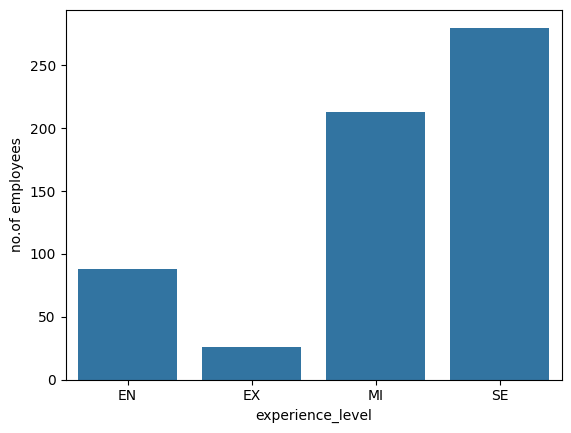

In [34]:
sns.barplot(data =exp_group,x = 'experience_level',y = 'Unnamed: 0' )
plt.ylabel('no.of employees')

Text(0.5, 0, 'no.of employees')

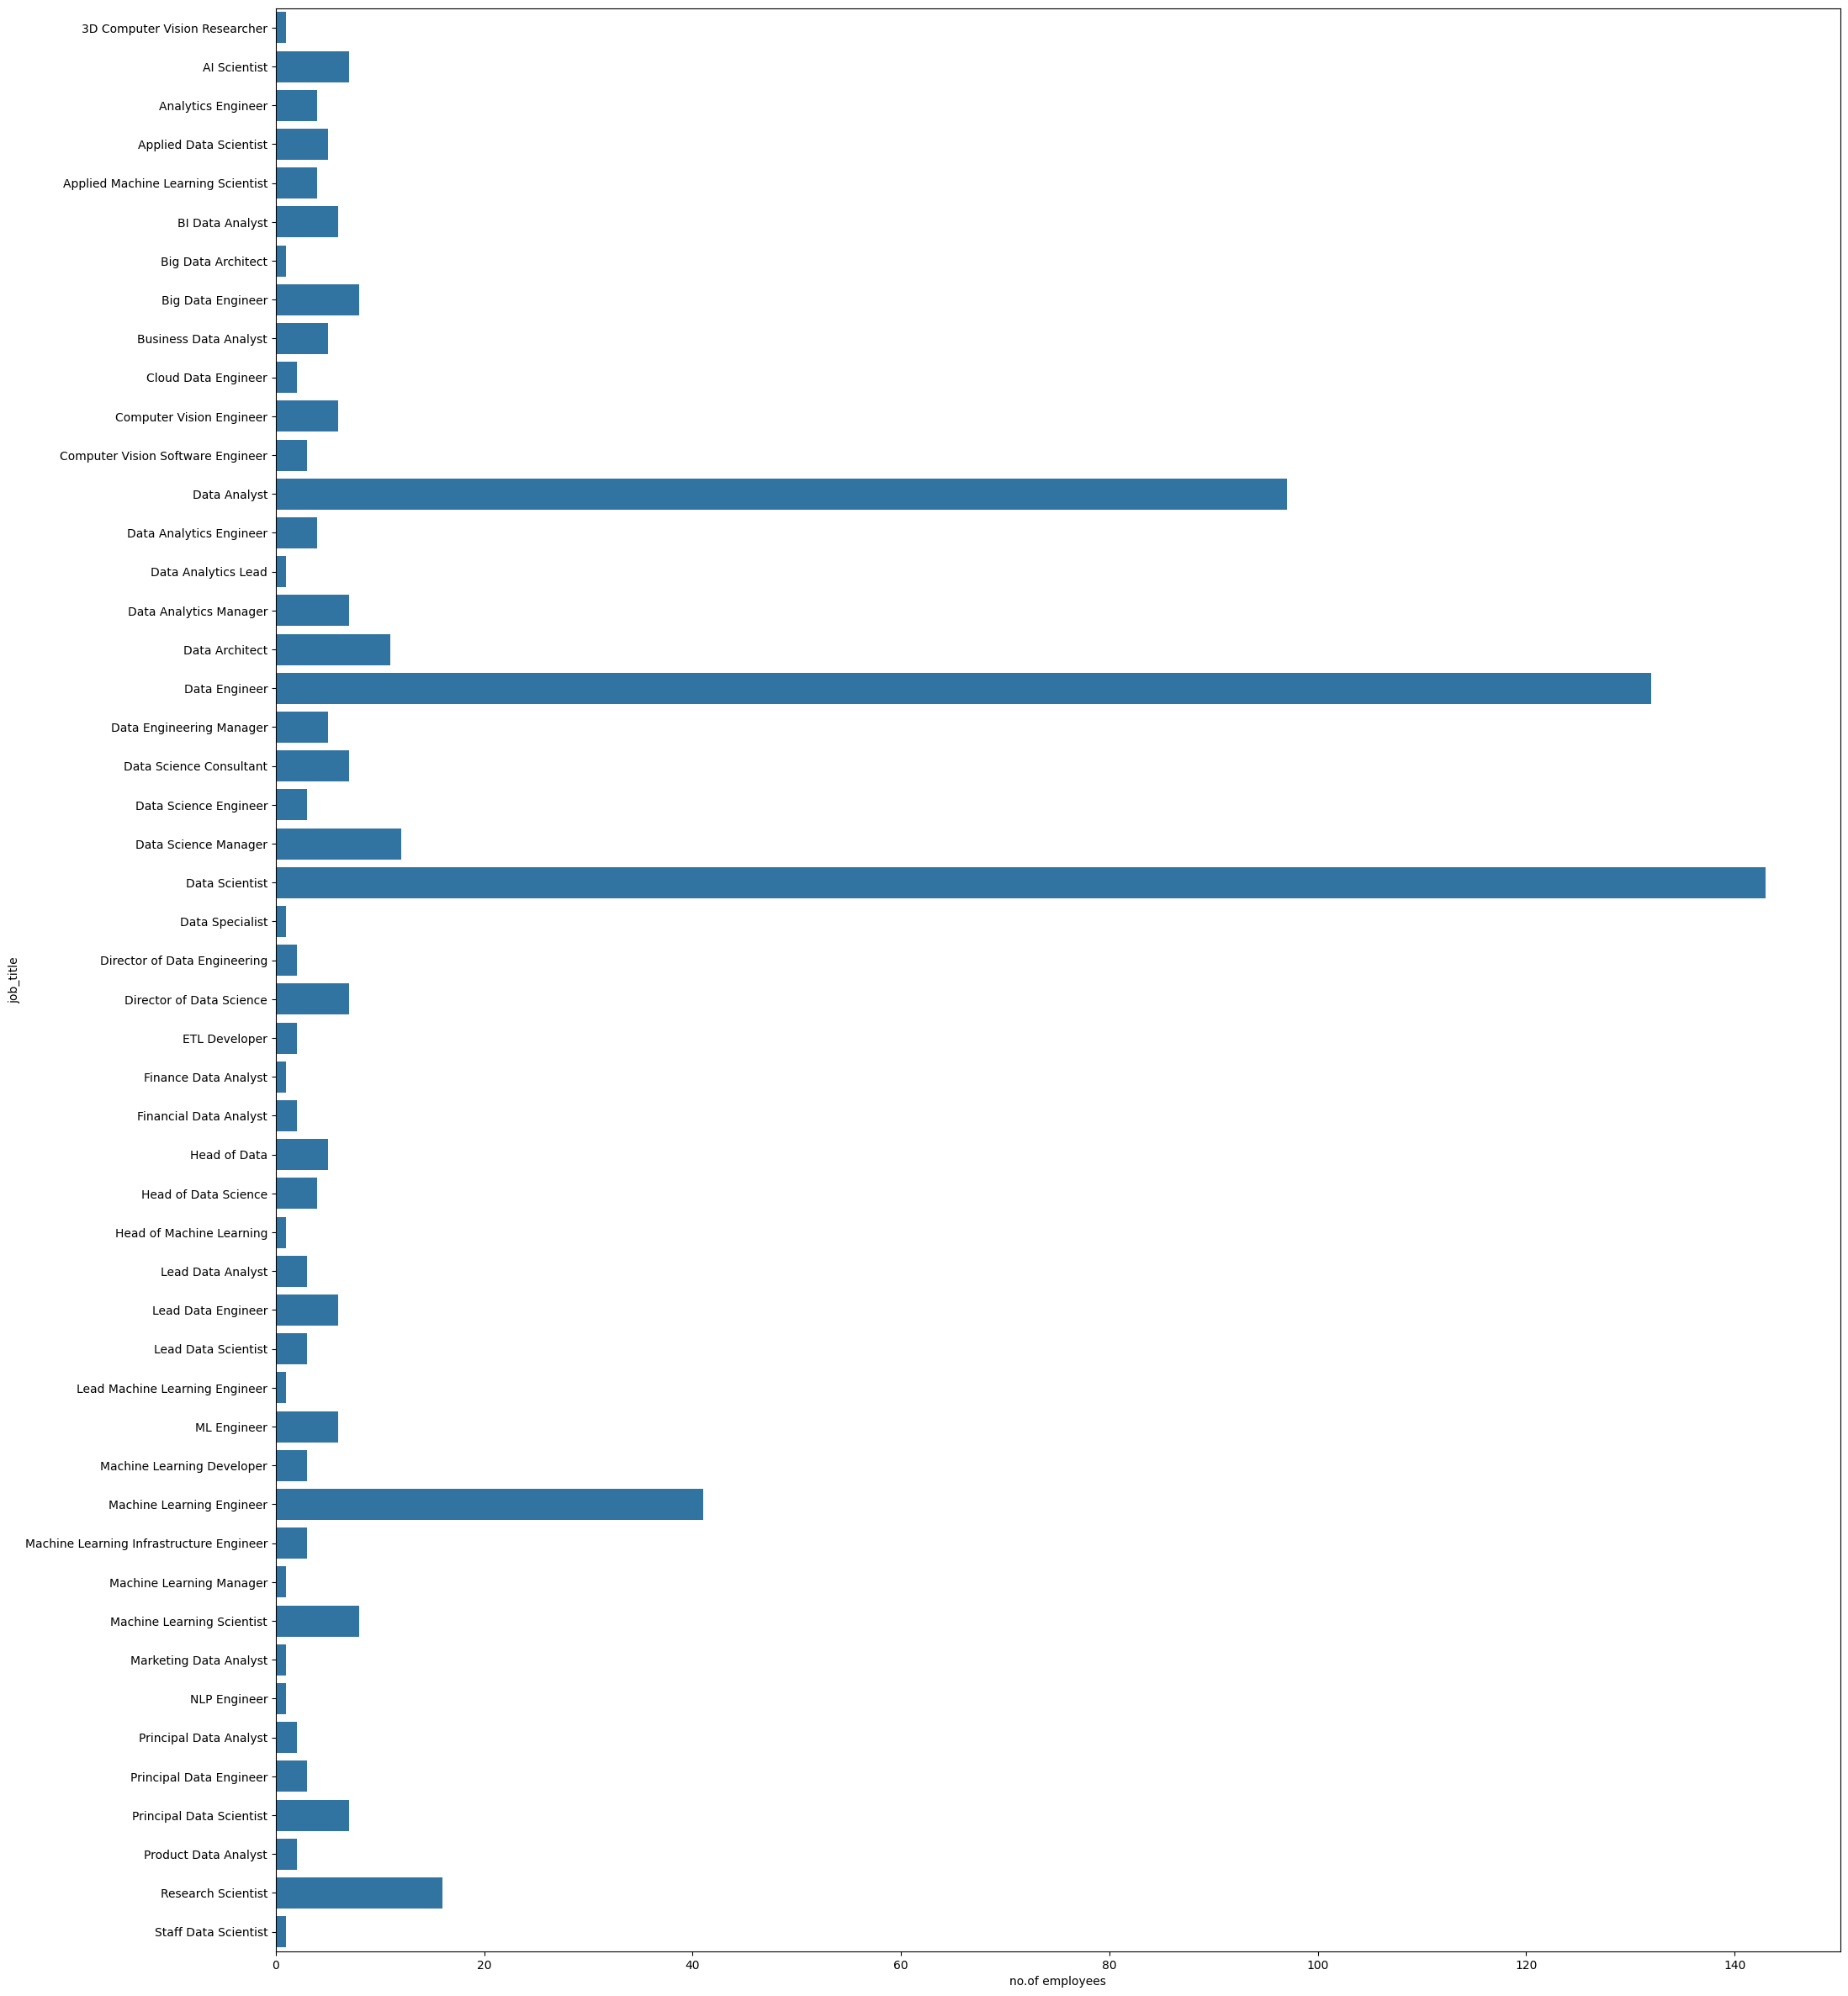

In [35]:
plt.figure(figsize=(24, 30))
sns.barplot(x='Unnamed: 0', y='job_title', data=jobtitle_group)
plt.xlabel('no.of employees')

Text(0, 0.5, 'no.of employees')

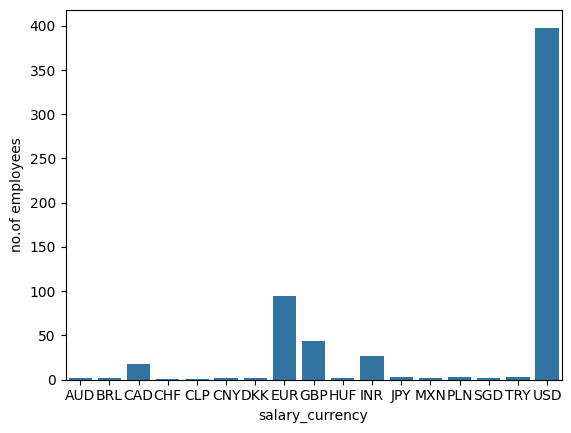

In [36]:
sns.barplot(data = salary_group,x = 'salary_currency',y = 'Unnamed: 0')
plt.ylabel('no.of employees')



In [37]:
df1 = pd.DataFrame(df,columns = ['work_year','salary','salary_in_usd','remote_ratio'])
mean_values = df1.mean()
median_values = df1.median()
std_values = df1.std()

print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Standard Deviation values:\n", std_values)

Mean values:
 work_year          2021.405272
salary           324000.062603
salary_in_usd    112297.869852
remote_ratio         70.922570
dtype: float64
Median values:
 work_year          2022.0
salary           115000.0
salary_in_usd    101570.0
remote_ratio        100.0
dtype: float64
Standard Deviation values:
 work_year        6.921330e-01
salary           1.544357e+06
salary_in_usd    7.095726e+04
remote_ratio     4.070913e+01
dtype: float64


## TASK4

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

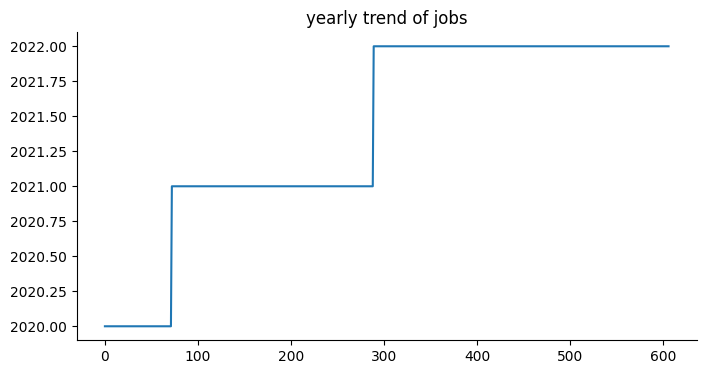

In [40]:
df['work_year'].plot(kind='line', figsize=(8, 4), title='yearly trend of jobs')
## Get Current Axes
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Salary Distribution')

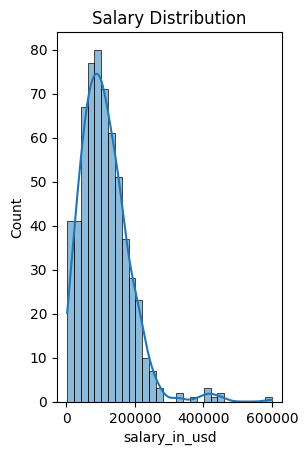

In [41]:
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')

Text(0.5, 1.0, 'Salary Distribution')

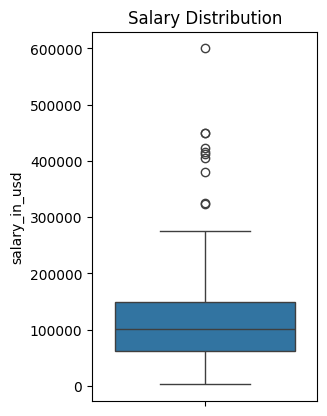

In [42]:
plt.subplot(1, 2, 2)
sns.boxplot(df['salary_in_usd'])
plt.title('Salary Distribution')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'IN'),
  Text(3, 0, 'CA'),
  Text(4, 0, 'DE'),
  Text(5, 0, 'FR'),
  Text(6, 0, 'ES'),
  Text(7, 0, 'GR'),
  Text(8, 0, 'JP'),
  Text(9, 0, 'PT'),
  Text(10, 0, 'BR'),
  Text(11, 0, 'PK'),
  Text(12, 0, 'NL'),
  Text(13, 0, 'PL'),
  Text(14, 0, 'IT'),
  Text(15, 0, 'RU'),
  Text(16, 0, 'AE'),
  Text(17, 0, 'AT'),
  Text(18, 0, 'VN'),
  Text(19, 0, 'TR'),
  Text(20, 0, 'AU'),
  Text(21, 0, 'RO'),
  Text(22, 0, 'BE'),
  Text(23, 0, 'SG'),
  Text(24, 0, 'SI'),
  Text(25, 0, 'DK'),
  Text(26, 0, 'HU'),
  Text(27, 0, 'NG'),
  Text(28, 0, 'MX'),
  Text(29, 0, 'BO'),
  Text(30, 0, 'MY'),
  Text(31, 0, 'TN'),
  Tex

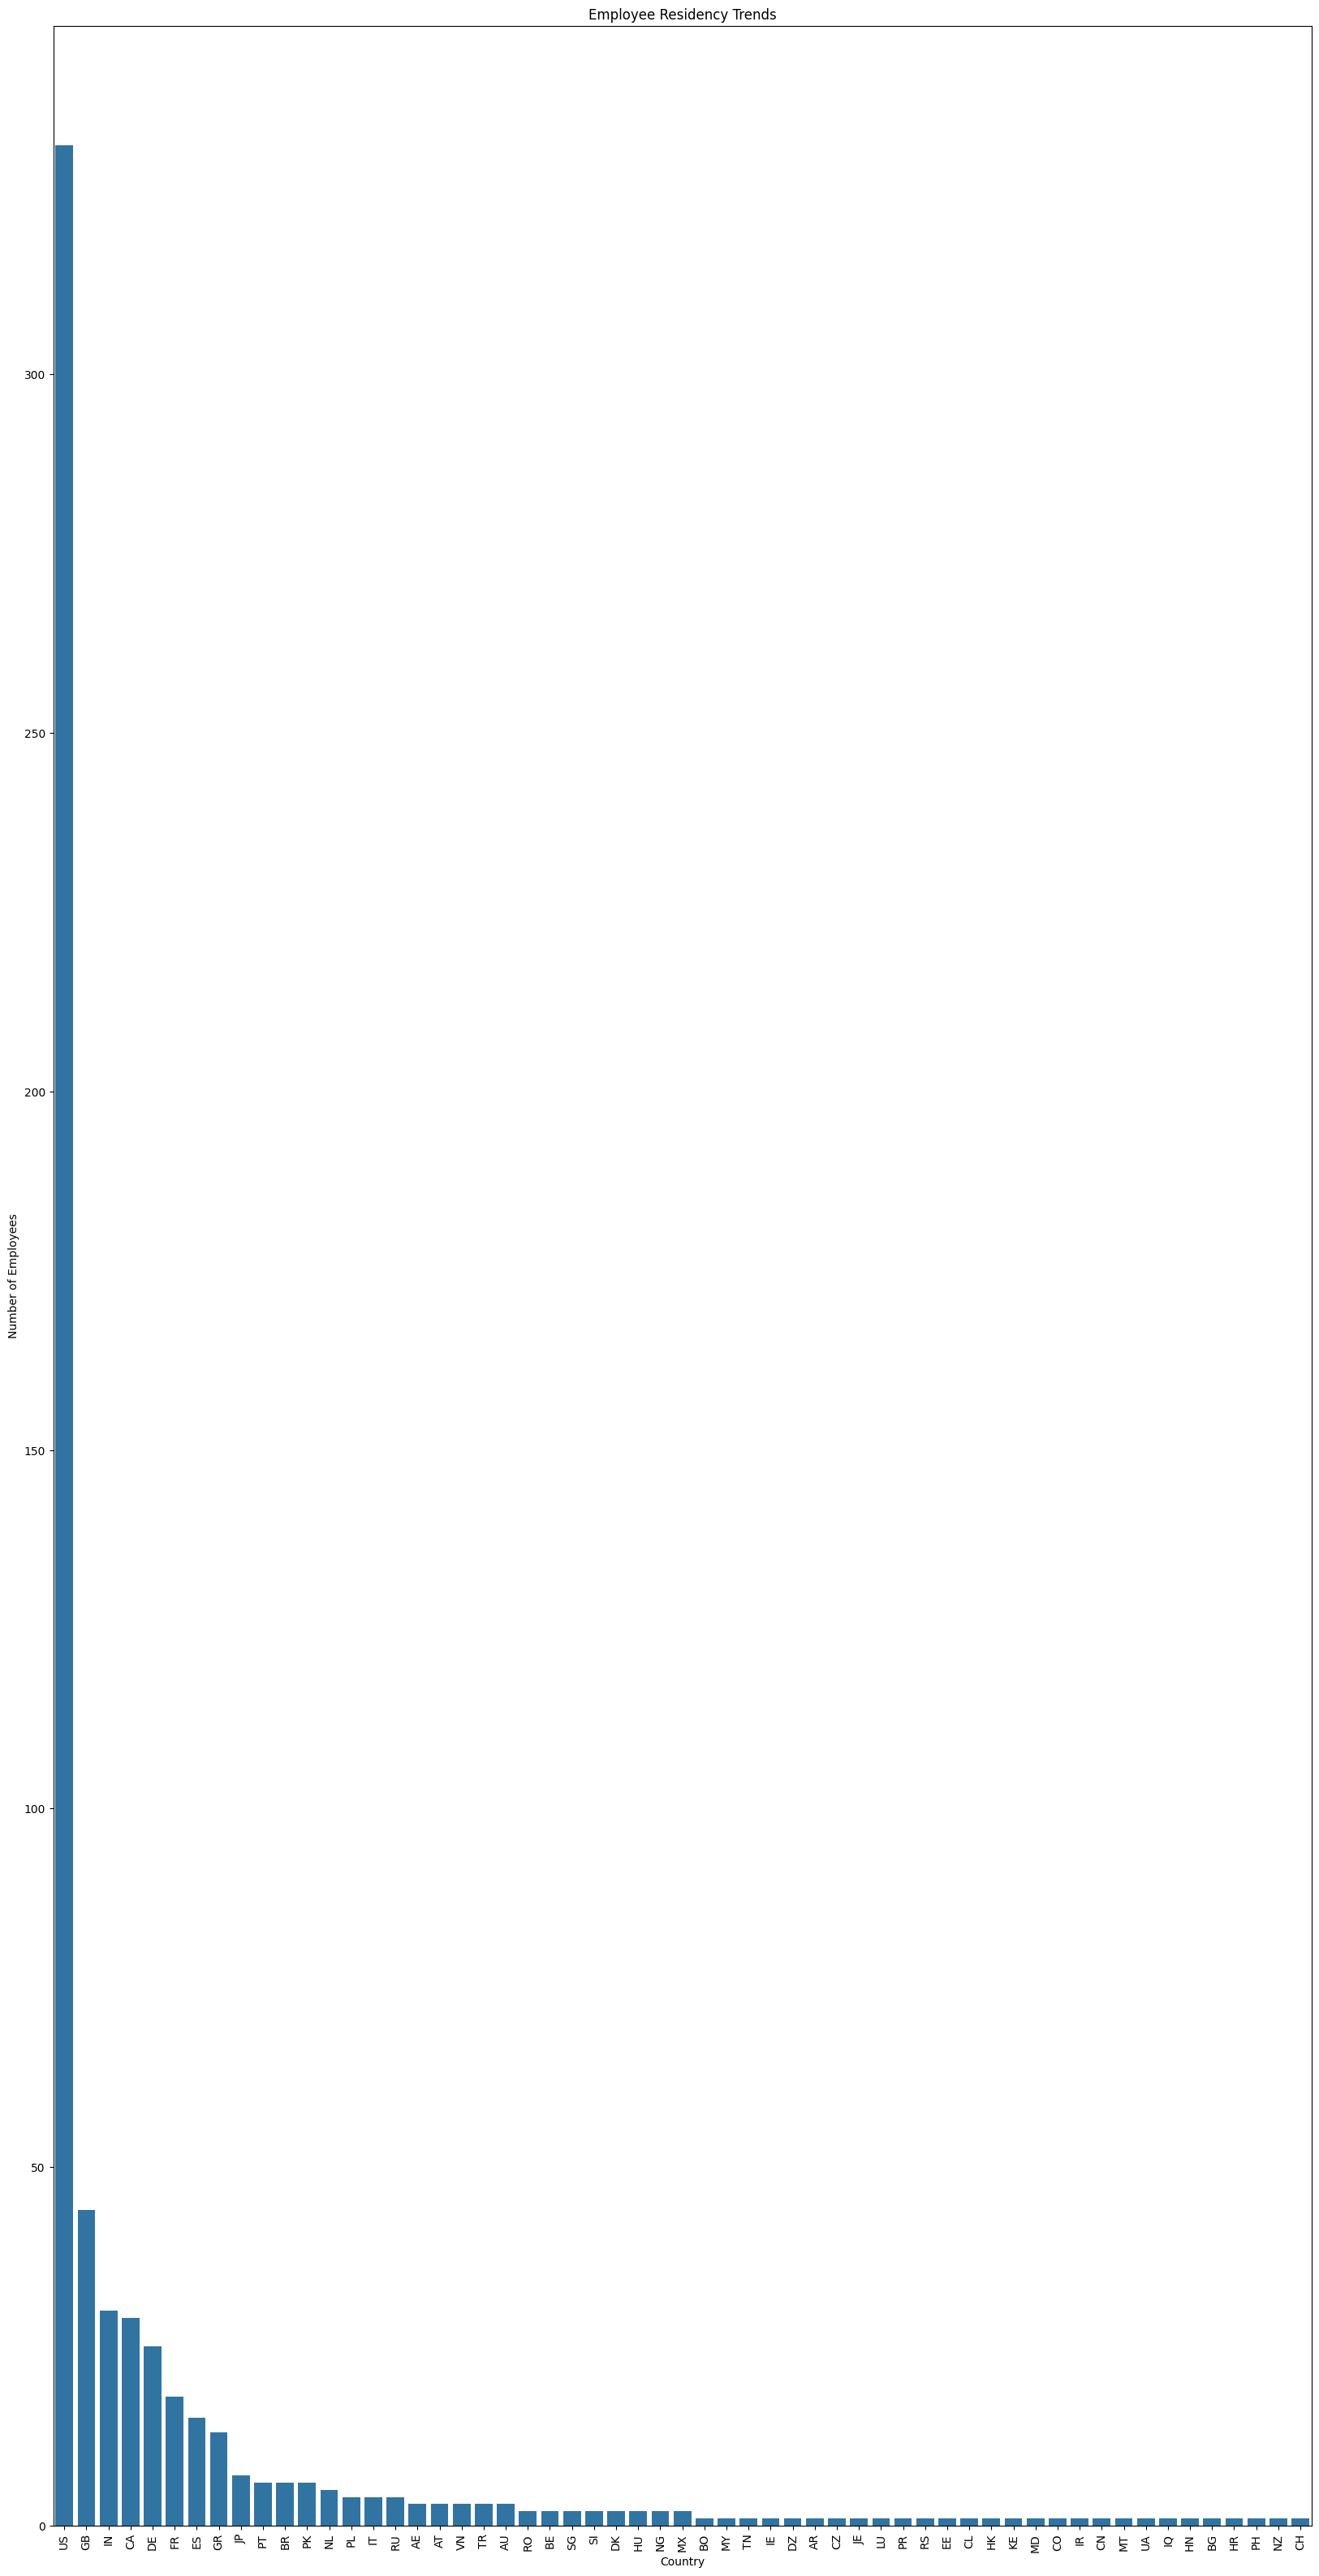

In [43]:
plt.figure(figsize=(20, 40))
employee_residency = df['employee_residence'].value_counts()

sns.barplot(x=employee_residency.index, y=employee_residency.values)
plt.title('Employee Residency Trends')
plt.xlabel('Country')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)

In [44]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 36.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=414fe6a049908729096a26c7b890d5cd3d2f900621cfd36c38eb4cfc1d430f29
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [45]:
report = ProfileReport(df)
report

Output hidden; open in https://colab.research.google.com to view.